/tmp/ipython-input-1-2637797163.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('BTC-USD', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Input shape: (1766, 60, 1)
Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0217
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.2621e-04
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.9608e-04
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.0078e-04
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.0037e-04
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.8973e-04
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.9033e-04
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.7466e-04
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


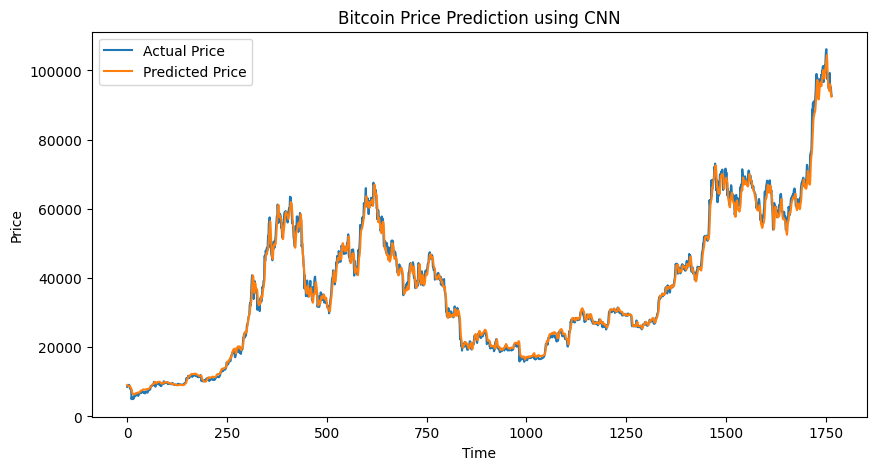

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten

# 1. Load Bitcoin Data
df = yf.download('BTC-USD', start='2020-01-01', end='2024-12-31')
data = df['Close'].values.reshape(-1, 1)

# 2. Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. Prepare dataset for CNN
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# CNN expects 3D input (samples, timesteps, features)
print("Input shape:", X.shape)

# 4. Build CNN Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the model
model.fit(X, y, epochs=10, batch_size=32)

# 6. Predict on training data (for visualization)
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y)

# 7. Plot the prediction
plt.figure(figsize=(10, 5))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Bitcoin Price Prediction using CNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
